**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from scipy.spatial import distance_matrix
from sklearn.base import ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

/home/vsevolod/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy import stats
from sklearn.neighbors import KDTree
from scipy.spatial.distance import cdist

In [3]:
class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.X = X
        elif self.algorithm == 'kd_tree':
            self.tree = KDTree(X)
        self.y = y
        self.classes = np.sort(np.unique(y))

    def get_neighs(self, X):
        if self.algorithm == 'brute':
            #print(X.shape)
            #print(self.X.shape)
            dist = cdist(X, self.X, metric=self.metric)
            dist = dist.argsort(axis=1)[:, :self.n_neighbors]
            return self.y[dist]
        elif self.algorithm == 'kd_tree':
            dist, indices = self.tree.query(X, k=self.n_neighbors)
            return self.y[indices]

    def predict(self, X):
        #print(X.shape)
        ans = np.empty((0, 1), int)
        yAll = self.get_neighs(X)
        for y in yAll:
            y1, counts = np.unique(y, return_counts=True)
            y1.sort()
            y1 = y1[(-counts).argsort()]
            ans = np.append(ans, y1[0])
        return ans

    def score(self, X, y):
        pr = self.predict(X)
        score = np.average(pr == y)
        return score


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy.

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 1.52 ms, sys: 197 µs, total: 1.72 ms
Wall time: 1.44 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 351 µs, sys: 46 µs, total: 397 µs
Wall time: 324 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 6.45 ms, sys: 0 ns, total: 6.45 ms
Wall time: 6.94 ms


array([1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 2])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 3.24 ms, sys: 0 ns, total: 3.24 ms
Wall time: 2.38 ms


array([1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 5.55 ms, sys: 0 ns, total: 5.55 ms
Wall time: 6.09 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.27 ms, sys: 158 µs, total: 1.43 ms
Wall time: 1.17 ms


In [17]:
%time clf.predict(X_test)

CPU times: user 9.82 ms, sys: 3.76 ms, total: 13.6 ms
Wall time: 9.81 ms


array([0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 7.26 ms, sys: 0 ns, total: 7.26 ms
Wall time: 6.13 ms


array([0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

In [22]:
import re

In [23]:
data_tok = []
data = [text.lower() for text in data]
data = [re.sub('[^0-9a-zA-Z]+', ' ', text) for text in data]
for text in data:
    text = text.split(' ')
    text = list(filter(lambda a: a != '', text))
    if text:
        data_tok.append(text)

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=2, max_features=1500)
new_data = []
new_target = np.empty((0, 1), int)
for i, text in enumerate(data):
    if text.isspace():
        continue
    if text == '':
        continue
    new_data.append(text)
    new_target = np.append(new_target, target[i])
vectorizer.fit(new_data)
X = vectorizer.transform(new_data)


In [25]:
X = X.todense()
X = np.array(X)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
from tqdm import tqdm

100%|██████████| 10/10 [15:30<00:00, 93.05s/it]


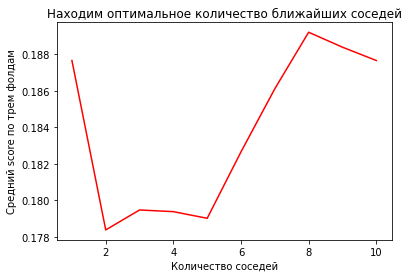

In [28]:
scores = []
for i in tqdm(range(1, 11)):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    score = cross_val_score(my_clf, X, new_target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей')
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

100%|██████████| 10/10 [15:03<00:00, 90.31s/it]


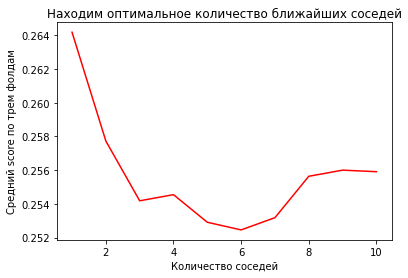

In [29]:
# cosine
scores = []
for i in tqdm(range(1, 11)):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
    score = cross_val_score(my_clf, X, new_target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей')
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

In [31]:
vectorizer.fit(new_data)
X = vectorizer.transform(new_data)
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X, new_target)
X = X.todense()
X = np.array(X)


In [32]:
X.shape

(11004, 1500)

100%|██████████| 10/10 [15:25<00:00, 92.54s/it]


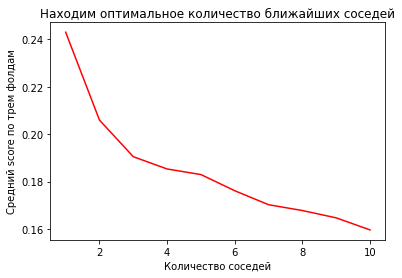

In [33]:
# TfIdf
scores = []
for i in tqdm(range(1, 11)):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    score = cross_val_score(my_clf, X, new_target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей')
plt.show()

100%|██████████| 10/10 [15:07<00:00, 90.71s/it]


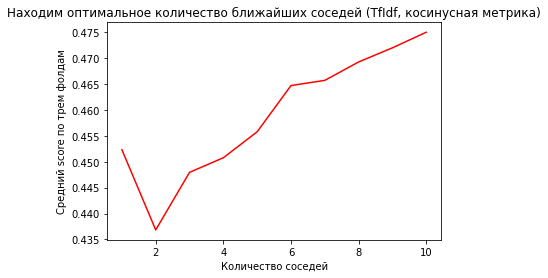

In [34]:
# TfIdf
# metric='cosine'
scores = []
for i in tqdm(range(1, 11)):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
    score = cross_val_score(my_clf, X, new_target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей (TfIdf, косинусная метрика)')
plt.show()

In [35]:
# Лучший средний score получен при использовании TfIdf, косинусной метрики и одного ближайшего соседа
my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute', metric='cosine')
score = cross_val_score(my_clf, X, new_target, cv=3, scoring='accuracy')
print('score = ', score.mean())

score =  0.474918211559433


Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [36]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [37]:
test_data = newsgroups['data']
test_target = newsgroups['target']

In [38]:
test_data = [text.lower() for text in test_data]
test_data = [re.sub('[^0-9a-zA-Z]+', ' ', text) for text in test_data]
new_test_data = []
new_test_target = np.empty((0, 1), int)
for i, text in enumerate(test_data):
    if text.isspace():
        continue
    if text == '':
        continue
    new_test_data.append(text)
    new_test_target = np.append(new_test_target, test_target[i])


In [39]:

test_X = vectorizer.transform(new_test_data)
tfidf_transformer = TfidfTransformer()
test_X = tfidf_transformer.fit_transform(test_X, new_test_target)
test_X = test_X.todense()
test_X = np.array(test_X)


In [40]:
# Fit train data, predict on test data
my_clf = MyKNeighborsClassifier(n_neighbors=10,
                                algorithm='brute', metric='cosine')
my_clf.fit(X, new_target)
test_score = my_clf.score(test_X, new_test_target)
print(test_score)

0.4359009440415926


In [41]:
# получаем тестовый score
my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute', metric='cosine')
score = cross_val_score(my_clf, test_X, new_test_target, cv=3, scoring='accuracy')
print('score = ', score.mean())

score =  0.4395939694533217


Результат получился хуже на 0.035 тк мы оптимизировали наш алгоритм под данные, которые отличаются от тестовых

На евклидовой метрике TfIdf показал себя хуже CountVectorizer, но при использовании TfIdf и косинусной метрики результат сильно взлетает 

Косинусная метрика при любом раскладе показала лучший результат чем евклидовая